# **VIRTUAL INTERNSHIP EXPERIENCE - KPMG**
---

## Task 1 - Data Quality Assesment

📑 **Objective** :
- Preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data.
- The 3 datasets attached from Sprocket Central Pty Ltd:
    - Customer Demographic 
    - Customer Addresses
    - Transaction data in the past three months

<br>
<br>

# **Load Dataset**
---

In [1]:
# import dataset
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

I have **seperated the worksheets** in the Excelsheet into different CSV files as **Transaction**, **CustomerAddress**, and **CustomerDemography**.

In [2]:
# read data set
df_demo = pd.read_csv('CustomerDemographic.csv')
df_addr = pd.read_csv('CustomerAddress.csv')
df_tran = pd.read_csv('Transaction.csv')

<br>
<br>

# **Customer Demographic**
---

### **1. Exploratory Data Analysis**

#### 1.1. Checking Data Type and Unique Values

In [3]:
# sampling dataset
df_demo.sample(5)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
634,635,Joelle,Prior,Female,78,1976-09-25,Programmer Analyst IV,NaN,Mass Customer,N,0/0,Yes,9.0
3175,3176,Rafe,Antoniak,Male,60,1977-12-04,Physical Therapy Assistant,NaN,Affluent Customer,N,â«testâ«,No,16.0
2794,2795,Shirline,Amar,Female,9,1966-04-11,Research Assistant III,Financial Services,Mass Customer,N,"__ï¾(,_,*)",No,17.0
3369,3370,Brant,Follis,Male,8,1954-01-22,Data Coordiator,NaN,High Net Worth,N,ÃÃÃÃËÃÃï£¿ÃÃÃâ,Yes,5.0
1348,1349,Curran,Gush,Male,83,1997-05-07,Electrical Engineer,Manufacturing,Affluent Customer,N,ÃÃÃÃËÃÃï£¿ÃÃÃâ,No,1.0


In [4]:
# checking shape
df_demo.shape

(4000, 13)

In [5]:
# checking dataset info
df_demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4000 non-null   int64  
 1   first_name                           4000 non-null   object 
 2   last_name                            3875 non-null   object 
 3   gender                               4000 non-null   object 
 4   past_3_years_bike_related_purchases  4000 non-null   int64  
 5   DOB                                  3913 non-null   object 
 6   job_title                            3494 non-null   object 
 7   job_industry_category                3344 non-null   object 
 8   wealth_segment                       4000 non-null   object 
 9   deceased_indicator                   4000 non-null   object 
 10  default                              3698 non-null   object 
 11  owns_car                      

In [6]:
# Checking unique value from each columns
for col in df_demo.columns:
    print("{} have {} unique values: {}".format(col, df_demo[col].nunique(), df_demo[col].dtypes))
    if df_demo[col].dtypes == 'int64' or df_demo[col].dtypes == 'float' or df_demo[col].dtypes == 'object':
        print("{} values: {}".format(col,df_demo[col].unique()))
        print('')

customer_id have 4000 unique values: int64
customer_id values: [   1    2    3 ... 3998 3999 4000]

first_name have 3139 unique values: object
first_name values: ['Laraine' 'Eli' 'Arlin' ... 'Stephie' 'Rusty' 'Sarene']

last_name have 3725 unique values: object
last_name values: ['Medendorp' 'Bockman' 'Dearle' ... 'Halgarth' 'Woolley' 'Oldland']

gender have 6 unique values: object
gender values: ['F' 'Male' 'Female' 'U' 'Femal' 'M']

past_3_years_bike_related_purchases have 100 unique values: int64
past_3_years_bike_related_purchases values: [93 81 61 33 56 35  6 31 97 49 99 58 38 85 91 57 79 76 72 74 43 55 12 37
  5 62 18  3 17 44 59 40 46 64 24 63 98 51 68 22  2 48 87 26 60 47 73 21
 67 16 78 30 94 28 20 11  1 75 41 69 19 80 83 25 54  4 23 65 88 10 77  9
 82 27 53 32 34 71 36 90 95  8 39  7 42 13 45 50 14 89 84 96 70 66  0 15
 86 92 29 52]

DOB have 3448 unique values: object
DOB values: ['1953-10-12' '1980-12-16' '1954-01-20' ... '1975-12-12' '2001-07-13'
 '1991-11-05']

job_title 

In [7]:
# numerical data
nums = df_demo.loc[:, (df_demo.dtypes == 'int64') | (df_demo.dtypes == float)].columns.tolist()
print(nums)
print('Counts :', len(nums))

['customer_id', 'past_3_years_bike_related_purchases', 'tenure']
Counts : 3


In [8]:
# categorical data
cats = df_demo.loc[:, (df_demo.dtypes == object)].columns.tolist() 
print(cats)
print('Counts :', len(cats))

['first_name', 'last_name', 'gender', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'default', 'owns_car']
Counts : 10


🔎 **Observation :**
- The dataset consists of **4000 records** and **26 columns**, with **3 numerical** and **10 categorical** columns.
- The inappropriate dataset type is found in the **DOB** column which should be **DateTime**. The value in this column can be converted to **age/age_class** so that it can be more insightful.
- The **tenure** column should be an integer 
- There are **irrelevant** columns that need to be dropped, such as **default**.
- There are **inconsistent value** in the **gender** column, so it needs to be treated.
- **deceased_indicator** and **owns_car values** column are suggested be **Boolean**. The value **'Y'** in **deceased_indicator** are **not current** customers and recomended to deleted these records because we want only live customers.


#### 1.2. Checking Missing Values

In [9]:
# percentages missing value of dataset
nan_df = df_demo[df_demo.isna().any(axis=1)]
nan_percent = round(len(nan_df)/len(df_demo)*100, 2)
print('Percentages missing value of dataset :', nan_percent, '%')

Percentages missing value of dataset : 34.25 %


In [10]:
# checking missing value of each columns
counts = df_demo.isna().sum().sort_values(ascending=False)

# percentages of missing value
percent = round(df_demo.isna().mean()*100, 2).sort_values(ascending=False)

# create dataframe of missing value
df_demo_nan = pd.concat([counts,percent], axis=1, keys=['missing value counts', '%'])
df_demo_nan

,missing value counts,%
job_industry_category,656,16.40
job_title,506,12.65
default,302,7.55
last_name,125,3.12
DOB,87,2.17
tenure,87,2.17
customer_id,0,0.00
first_name,0,0.00
gender,0,0.00
past_3_years_bike_related_purchases,0,0.00


🔎 **Observation :**
There are many missing values in the dataset (**more than 10%**).**job_industry_category** and **job_title** are the columns that contain the **most** missing values.

#### 1.3. Checking Duplicate Records

In [11]:
# checking duplicated data
df_demo.duplicated().any()

False

🔎 **Observation :**
There is **no duplicate data**.

#### 1.4. Statistical Summary

In [12]:
# numerical value
df_demo[nums].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,4000.0,2000.500000,1154.844867,1.0,1000.75,2000.5,3000.25,4000.0
past_3_years_bike_related_purchases,4000.0,48.890000,28.715005,0.0,24.00,48.0,73.00,99.0
tenure,3913.0,10.657041,5.660146,1.0,6.00,11.0,15.00,22.0


In [13]:
# categorical value
df_demo[cats].describe().T

,count,unique,top,freq
first_name,4000,3139,Max,5
last_name,3875,3725,Pristnor,3
gender,4000,6,Female,2037
DOB,3913,3448,1978-01-30,7
job_title,3494,195,Business Systems Development Analyst,45
job_industry_category,3344,9,Manufacturing,799
wealth_segment,4000,3,Mass Customer,2000
deceased_indicator,4000,2,N,3998
default,3698,101,1.00E+02,111
owns_car,4000,2,Yes,2024


#### 1.5 Checking Distribution

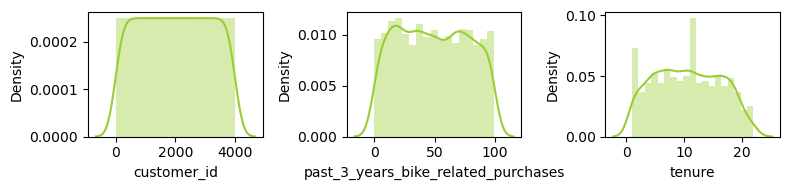

In [14]:
# distribution numerical data
plt.figure(figsize=(8, 2))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.distplot(df_demo[nums[i]], color='yellowgreen')
    plt.tight_layout()

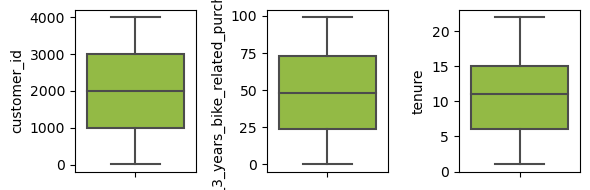

In [15]:
# distribution numerical data and check outlier
plt.figure(figsize=(6, 2))
for i in range(0, len(nums)):
    plt.subplot(1, len(nums), i+1)
    sns.boxplot(y=df_demo[nums[i]], color='yellowgreen', orient='v')
    plt.tight_layout()

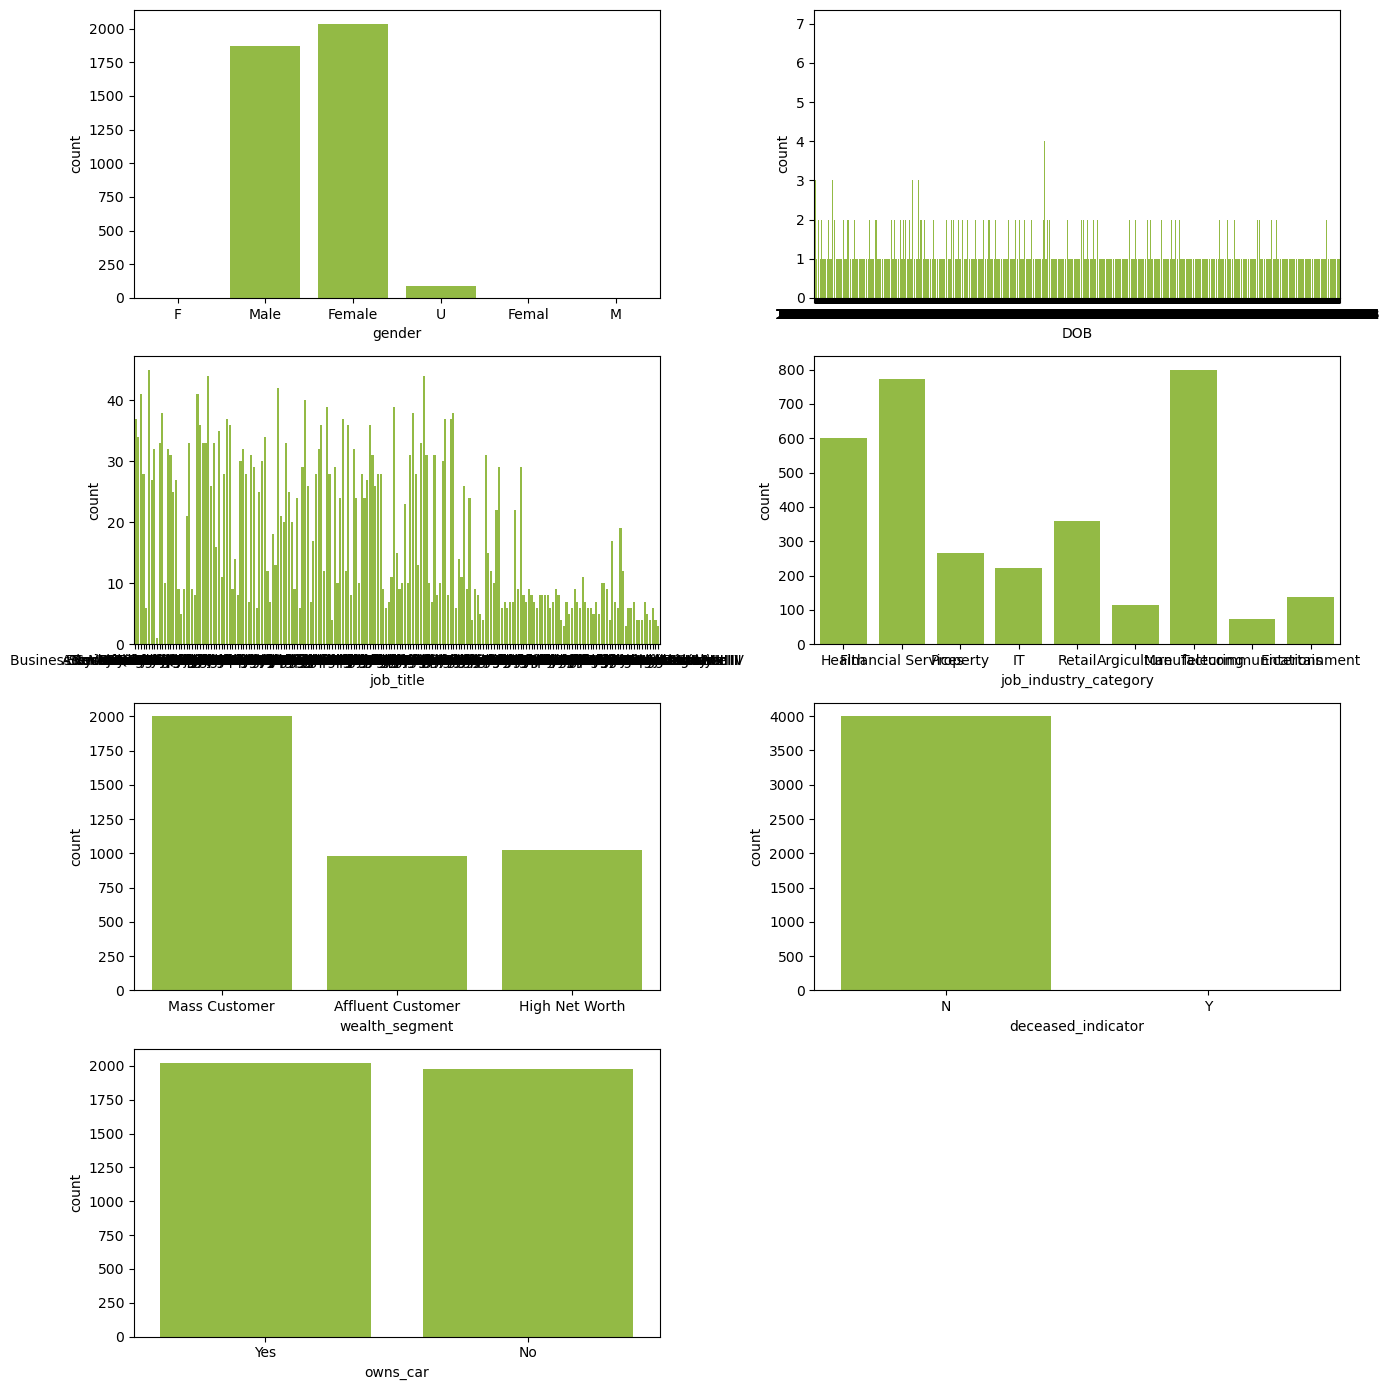

In [16]:
# visualization/countplot categorikal data
cats = ['gender', 'DOB', 'job_title', 'job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car']
plt.figure(figsize=(14, 14))
for i in range(0, len(cats)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df_demo[cats[i]], color='yellowgreen', orient='v')
    plt.tight_layout()

🔎 **Observation :**
- The data distribution tends to be **normal**.
- There are **no outlier/ anomaly record**.

### **2. Data Cleaning**

#### 2.1 Dropping Irrelavant Columns

In [17]:
# crete copy of dataset
df_demo1 = df_demo.copy()

In [18]:
# drop columns
df_demo1.drop(columns=['default'], inplace=True)

In [19]:
df_demo1.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure'],
      dtype='object')

The dataset has been cleared of irrelevant columns ✅

#### 2.2 Handling Missing Values

In [20]:
df_demo1.isna().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

🔽 **`first_name` and `last_name`**
> It is assumed that the user did not fill in or does not have a last name, so I decided to fill the NaN **last name value with the first name**.

In [21]:
# filling nan in last name with first name
df_demo1['last_name'].fillna(df_demo1['first_name'], inplace=True)

🔽 **`job_title` and `job_industry_category`**
> Because the number of missing values in this column is quite **large** (500+) and considering the frequency of **unique values**, I decided to **fill NaN with previous value**.

In [22]:
df_demo1['job_title'].value_counts()

Business Systems Development Analyst    45
Tax Accountant                          44
Social Worker                           44
Internal Auditor                        42
Recruiting Manager                      41
                                        ..
Database Administrator I                 4
Health Coach I                           3
Health Coach III                         3
Research Assistant III                   3
Developer I                              1
Name: job_title, Length: 195, dtype: int64

In [23]:
df_demo1['job_industry_category'].value_counts()

Manufacturing         799
Financial Services    774
Health                602
Retail                358
Property              267
IT                    223
Entertainment         136
Argiculture           113
Telecommunications     72
Name: job_industry_category, dtype: int64

In [24]:
# filling nan with previous value
fill = ['job_title','job_industry_category']

for x in fill:
    df_demo1[x].fillna(method='pad',inplace=True)

🔽 **`DOB`**
> frequency of missing values more large than mode, so I decided to **fill NaN with previous value**.

In [25]:
df_demo1['DOB'].fillna(method='pad',inplace=True)

🔽 **`tenure`**

In [26]:
df_demo1['tenure'].fillna(method='pad',inplace=True)

In [27]:
df_demo1.isna().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
DOB                                    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
dtype: int64

The dataset has been cleared of missing values ✅

#### 2.3 Handling Data Type & Incorrect Values

🔽 **`gender`**

In [28]:
# checking value counts gender
df_demo1['gender'].value_counts()

Female    2037
Male      1872
U           88
F            1
Femal        1
M            1
Name: gender, dtype: int64

In [29]:
# fixing inconsitency value
df_demo1.replace(to_replace= ['F', 'Femal', 'U'], value = 'Female', inplace=True)
df_demo1.replace(to_replace= ['M'], value = 'Male', inplace=True)

In [30]:
# checking 
df_demo1['gender'].value_counts()

Female    2127
Male      1873
Name: gender, dtype: int64

🔽 **`deceased_indicator`**

In [31]:
df_demo1['deceased_indicator'].replace(['Y', 'N'], ['Yes', 'No'], inplace=True)

In [32]:
# remove Yes deceased indicator
df_demo1[df_demo1['deceased_indicator'] == 'Yes']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
752,753,Josy,St. Quentin,Female,82,1970-03-07,Food Chemist,Health,Affluent Customer,Yes,Yes,6.0
3789,3790,Kurtis,Morson,Male,91,1959-05-31,Senior Editor,Retail,Mass Customer,Yes,Yes,9.0


In [33]:
df_demo1.drop([752, 3789], inplace=True)

In [34]:
df_demo1[df_demo1['deceased_indicator'] == 'Yes']

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure


In [35]:
# drop colums
df_demo1.drop(columns='deceased_indicator', inplace=True)

🔽 **`DOB`**

In [36]:
# fixing datatype
df_demo1['DOB'] = df_demo1['DOB'].astype('datetime64[ns]')

In [37]:
# create function tu calculate age
from datetime import date
def calculate_age(birthdate):
    today = date.today()
    age = today.year-birthdate.year-((today.month, today.day) < (birthdate.month, birthdate.day))
    return age

# fit into dataframe
df_demo1['age']=df_demo1['DOB'].apply(calculate_age)
df_demo1['age_class'] = (round(df_demo1['age']/ 10) * 10).astype(int)
df_demo1.drop(columns='age', inplace=True)

🔽 **`tenure`**

In [38]:
df_demo1['tenure'] = df_demo1['tenure'].astype('int64')

In [39]:
# sampling
df_demo1.sample(3)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,owns_car,tenure,age_class
3965,3966,Astrix,Sigward,Female,53,1968-09-15,Geologist I,Manufacturing,Mass Customer,Yes,11,50
646,647,Stanislas,Baildon,Male,61,1957-01-23,Assistant Manager,Retail,Mass Customer,Yes,10,70
2771,2772,Reynolds,Vreede,Male,15,1954-10-25,Quality Engineer,Property,Affluent Customer,Yes,13,70


In [40]:
df_demo1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3998 entries, 0 to 3999
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          3998 non-null   int64         
 1   first_name                           3998 non-null   object        
 2   last_name                            3998 non-null   object        
 3   gender                               3998 non-null   object        
 4   past_3_years_bike_related_purchases  3998 non-null   int64         
 5   DOB                                  3998 non-null   datetime64[ns]
 6   job_title                            3998 non-null   object        
 7   job_industry_category                3998 non-null   object        
 8   wealth_segment                       3998 non-null   object        
 9   owns_car                             3998 non-null   object        
 10  tenure      

The value and data type have been correct ✅

### **3. Save Clean Dataset**

In [41]:
df_demo1.to_csv('CustomerDemographic_CLEAN.csv', index=False)

<br>
<br>

# **Customer Address**
---

### **1. Exploratory Data Analysis**

#### 1.1. Checking Data Type and Unique Values

In [42]:
# sampling dataset
df_addr.sample(5)

,customer_id,address,postcode,state,country,property_valuation
3503,3508,7555 Springview Crossing,3195,VIC,Australia,10
1441,1446,70262 Hermina Court,3690,VIC,Australia,2
731,736,2726 Cardinal Way,3073,Victoria,Australia,5
3319,3324,4 Mayfield Center,3155,VIC,Australia,9
206,211,78 Rockefeller Park,2159,NSW,Australia,10


In [43]:
# checking shape
df_addr.shape

(3999, 6)

In [44]:
# checking dataframe information
df_addr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [45]:
# Checking unique value of each columns
for col in df_addr.columns:
    print("{} have {} unique values: {}".format(col, df_addr[col].nunique(), df_addr[col].dtypes))
    if df_addr[col].dtypes == 'int64' or df_addr[col].dtypes == 'object':
        print("{} values: {}".format(col,df_addr[col].unique()))
        print('')

customer_id have 3999 unique values: int64
customer_id values: [   1    2    4 ... 4001 4002 4003]

address have 3996 unique values: object
address values: ['060 Morning Avenue' '6 Meadow Vale Court' '0 Holy Cross Court' ...
 '87 Crescent Oaks Alley' '8194 Lien Street' '320 Acker Drive']

postcode have 873 unique values: int64
postcode values: [2016 2153 4211 2448 3216 2210 2650 2023 3044 4557 3799 2760 2428 3331
 3058 2135 2233 2444 4413 4740 3218 4868 4116 2519 2756 2170 4005 4127
 2535 4726 4805 2212 2207 3350 3931 4018 4670 2480 3212 2322 3198 2047
 4503 2145 4350 2142 2029 2127 4280 2166 2046 2026 2765 2749 2745 3752
 2217 2230 3046 3183 2070 2213 4208 2774 4133 4213 4170 2073 3561 2330
 3977 2204 2086 2226 2075 2038 2069 2100 3133 3070 2777 2125 2766 2209
 2160 2065 2150 2168 4171 2155 2517 2096 2750 2093 3204 4300 3844 4226
 3192 2485 2097 4817 2516 3074 4508 4405 2452 2205 4132 4744 2158 3201
 4178 2112 2033 4401 3186 4017 2315 2285 2219 4509 2759 2747 2227 2025
 3191 3025 2263

In [46]:
# numerical data
nums_a = df_addr.loc[:, (df_addr.dtypes == 'int64')].columns.tolist()
print(nums_a)
print('Counts :', len(nums_a))

['customer_id', 'postcode', 'property_valuation']
Counts : 3


In [47]:
# categorical data
cats_a = df_addr.loc[:, (df_addr.dtypes == object)].columns.tolist()
print(cats_a)
print('Counts :', len(cats_a))

['address', 'state', 'country']
Counts : 3


🔎 **Observation :**
- The dataset consists of **3999 records** and **6 columns**, with **3 numerical** and **3 categorical columns**.
- The data type in each column is appropriate.
- There are inconsistent value in the **state** column, so it needs to be treated.

#### 1.2 Checking Missing Values

In [48]:
# percentages missing value of dataset
nan_df = df_addr[df_addr.isna().any(axis=1)]
nan_percent = round(len(nan_df)/len(df_addr)*100, 2)
print('Percentages missing value of dataset :', nan_percent, '%')

Percentages missing value of dataset : 0.0 %


🔎 **Observation :**
There is **no missing values**.

#### 1.3 Checking Duplicate Records

In [49]:
# checking duplicated data
df_addr.duplicated().any()

False

🔎 **Observation :**
There is **no duplicate data**.

#### 1.4. Statistical Summary

In [50]:
# numerical
df_addr[nums_a].describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,3999.0,2003.987997,1154.576912,1.0,1004.5,2004.0,3003.5,4003.0
postcode,3999.0,2985.755939,844.878364,2000.0,2200.0,2768.0,3750.0,4883.0
property_valuation,3999.0,7.514379,2.824663,1.0,6.0,8.0,10.0,12.0


In [51]:
# categorical
df_addr[cats_a].describe().T

,count,unique,top,freq
address,3999,3996,3 Mariners Cove Terrace,2
state,3999,5,NSW,2054
country,3999,1,Australia,3999


#### 1.5 Checking Distribution

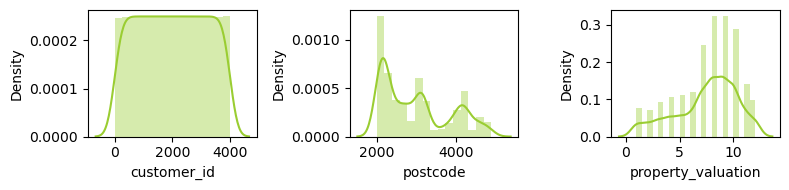

In [52]:
# distribution numerical data
plt.figure(figsize=(8, 2))
for i in range(0, len(nums_a)):
    plt.subplot(1, len(nums_a), i+1)
    sns.distplot(df_addr[nums_a[i]], color='yellowgreen')
    plt.tight_layout()

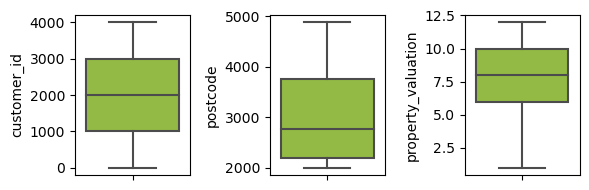

In [53]:
# distribution numerical data and check outlier
plt.figure(figsize=(6, 2))
for i in range(0, len(nums_a)):
    plt.subplot(1, len(nums_a), i+1)
    sns.boxplot(y=df_addr[nums_a[i]], color='yellowgreen', orient='v')
    plt.tight_layout()

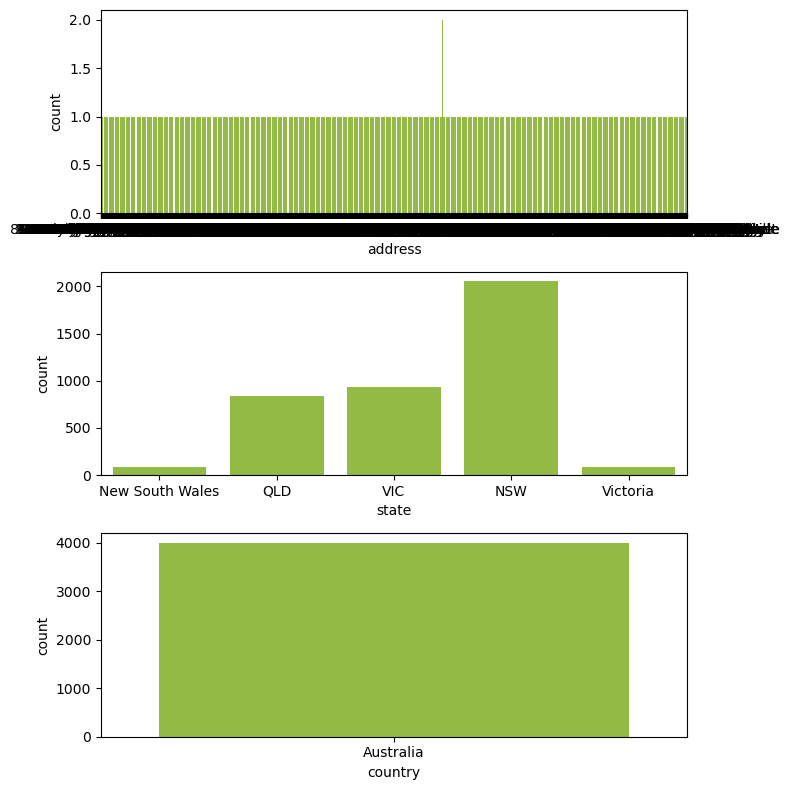

In [54]:
plt.figure(figsize=(8, 8))
for i in range(0, len(cats_a)):
    plt.subplot(3, 1, i+1)
    sns.countplot(x=df_addr[cats_a[i]], color='yellowgreen', orient='v')
    plt.tight_layout()

🔎 **Observation :**
- **property_valuation**: negtively skewed.
- There are **no outlier**.

### **2. Data Cleaning**

#### 2.1. Handling Incorrect Values

In [55]:
df_addr1 = df_addr.copy()

🔽 **`state`**
> There are inconsistentcy values in columns **state**. So I have replace 'New South Wales' to 'NSW' and 'Victoria' to 'VIC'.

In [56]:
# checking value counts state
df_addr1['state'].value_counts()

NSW                2054
VIC                 939
QLD                 838
New South Wales      86
Victoria             82
Name: state, dtype: int64

In [57]:
# replace values
df_addr1['state'].replace(['New South Wales', 'Victoria'], ['NSW', 'VIC'], inplace=True)

In [58]:
df_addr1['state'].value_counts()

NSW    2140
VIC    1021
QLD     838
Name: state, dtype: int64

The valu has been correct ✅

### **3. Save Clean Dataset**

In [59]:
df_addr1.to_csv('CustomerAddress_CLEAN.csv', index=False)

<br>
<br>

# **Transaction**
---

### **1. Exploratory Data Analysis**

#### 1.1 Checking Data Type and Unique Values

In [60]:
# sampling dataset
df_tran.sample(5)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
12180,12181.0,49.0,2221.0,2/3/2017,True,Approved,Trek Bicycles,Road,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18343,18344.0,74.0,2364.0,6/25/2017,True,Approved,WeareA2B,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8839,8840.0,72.0,1621.0,2/15/2017,False,Approved,Norco Bicycles,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7720,7721.0,19.0,765.0,8/18/2017,True,Approved,OHM Cycles,Road,high,large,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5265,5266.0,91.0,2725.0,7/2/2017,False,Approved,Solex,Standard,medium,medium,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
# checking shape
df_tran.shape

(20001, 26)

In [62]:
# checking dataset info
df_tran.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20001 entries, 0 to 20000
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   transaction_id           20000 non-null  float64
 1   product_id               20000 non-null  float64
 2   customer_id              20000 non-null  float64
 3   transaction_date         20000 non-null  object 
 4   online_order             19640 non-null  object 
 5   order_status             20000 non-null  object 
 6   brand                    19803 non-null  object 
 7   product_line             19803 non-null  object 
 8   product_class            19803 non-null  object 
 9   product_size             19803 non-null  object 
 10  list_price               20000 non-null  float64
 11  standard_cost            19803 non-null  object 
 12  product_first_sold_date  19803 non-null  float64
 13  Unnamed: 13              0 non-null      float64
 14  Unnamed: 14           

In [63]:
# Checking unique value from each columns
for col in df_tran.columns:
    print("{} have {} unique values: {}".format(col, df_tran[col].nunique(), df_tran[col].dtypes))
    if df_tran[col].dtypes == 'int64' or df_tran[col].dtypes == 'float' or df_tran[col].dtypes == 'object':
        print("{} values: {}".format(col,df_tran[col].unique()))
        print('')

transaction_id have 20000 unique values: float64
transaction_id values: [1.0000e+00 2.0000e+00 3.0000e+00 ... 1.9999e+04 2.0000e+04        nan]

product_id have 101 unique values: float64
product_id values: [  2.   3.  37.  88.  78.  25.  22.  15.  67.  12.   5.  61.  35.  16.
  79.  33.  54.  27.  82.  89.  64.  19.  72.  91.   1.  99.   0.  92.
  14.  44.  76.  46.  55.  66.  81.  86.  32.  77.  96.   6.  47.  94.
  93.  60.  28.   4.  38.  56.  58.  50.  80.  87.  84.  21.  31.  62.
  17.  73.  45.  49.  95.  18.  70.  26.  39.  36.  98.  75.  42.  20.
  24.  53.  65.  29.  11.  10.   7.  41.   9.  69.  90.  97. 100.  74.
  71.  34.  57.  23.  51.  59.  63.  40.   8.  13.  30.  48.  68.  83.
  43.  52.  85.  nan]

customer_id have 3494 unique values: float64
customer_id values: [2950. 3120.  402. ... 2789. 3446.   nan]

transaction_date have 364 unique values: object
transaction_date values: ['2/25/2017' '5/21/2017' '10/16/2017' '8/31/2017' '10/1/2017' '3/8/2017'
 '4/21/2017' '7/15/

In [64]:
# numerical data
nums_t = df_tran.loc[:, (df_tran.dtypes == 'int64') | (df_tran.dtypes == float)].columns.tolist()
print(nums_t)
print('Counts :', len(nums_t))

['transaction_id', 'product_id', 'customer_id', 'list_price', 'product_first_sold_date', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']
Counts : 18


In [65]:
# categorical data
cats_t = df_tran.loc[:, (df_tran.dtypes == object)].columns.tolist() 
print(cats_t)
print('Counts :', len(cats_t))

['transaction_date', 'online_order', 'order_status', 'brand', 'product_line', 'product_class', 'product_size', 'standard_cost']
Counts : 8


🔎 **Observation :**
- The dataset consists of **20001 records** and **26 columns**, **18 numerical** data, and **8 categorical** data.
- **transaction_id, product_id, customer_id, product_first_sold_date** is recommended to be **integer**.
- **transaction_date** is recommended to be a **datetime**.
- **standard_cost** is recommended to be **float** and there are inconsistencies in values and unwanted characters, so treatment is needed.
- There are columns that are not relevant, so they need to be dropped.

#### 1.2 Checking Missing Values

In [66]:
# checking missing value of each columns
counts = df_tran.isna().sum().sort_values(ascending=False)

# percentages of missing value
percent = round(df_tran.isna().mean()*100, 2).sort_values(ascending=False)

# create dataframe of missing value
df_demo_nan = pd.concat([counts,percent], axis=1, keys=['missing value counts', '%'])
df_demo_nan

,missing value counts,%
Unnamed: 13,20001,100.00
Unnamed: 14,20001,100.00
Unnamed: 24,20001,100.00
Unnamed: 23,20001,100.00
Unnamed: 22,20001,100.00
Unnamed: 21,20001,100.00
Unnamed: 20,20001,100.00
Unnamed: 19,20001,100.00
Unnamed: 18,20001,100.00
Unnamed: 17,20001,100.00


In [67]:
# percentages missing value of dataset

ex = ['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 
      'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25']
df_tran_s = df_tran.loc[:, ~df_tran.columns.isin(ex)]

nan_df = df_tran_s[df_tran_s.isna().any(axis=1)]
nan_percent = round(len(nan_df)/len(df_tran_s)*100, 2)
print('Percentages missing value of dataset :', nan_percent, '%')

Percentages missing value of dataset : 2.78 %


🔎 **Observation :**
There are a missing values of **less than 10%**. So I decided to drop it, as it is still safe and does not affect the analysis significantly.

#### 1.3 Checking Duplikat Records

In [68]:
# checking duplicated data
df_tran.duplicated().any()

False

🔎 **Observation :**
There are **no duplicate** records.

#### 1.4 Statistical Summary

In [69]:
# numerical value
df_tran[nums_t].describe().T

,count,mean,std,min,25%,50%,75%,max
transaction_id,20000.0,10000.500000,5773.647028,1.00,5000.75,10000.50,15000.25,20000.00
product_id,20000.0,45.364650,30.753590,0.00,18.00,44.00,72.00,100.00
customer_id,20000.0,1738.246050,1011.951046,1.00,857.75,1736.00,2613.00,5034.00
list_price,20000.0,1107.829449,582.825242,12.01,575.27,1163.89,1635.30,2091.47
product_first_sold_date,19803.0,38199.776549,2875.201110,33259.00,35667.00,38216.00,40672.00,42710.00
Unnamed: 13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 14,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 15,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 16,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 17,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
# categorical value
df_tran[cats_t].describe().T

,count,unique,top,freq
transaction_date,20000,364,2/14/2017,82
online_order,19640,2,True,9829
order_status,20000,2,Approved,19821
brand,19803,6,Solex,4253
product_line,19803,4,Standard,14176
product_class,19803,3,medium,13826
product_size,19803,3,medium,12990
standard_cost,19803,103,$388.92,465


#### 1.5 Checking Distribution

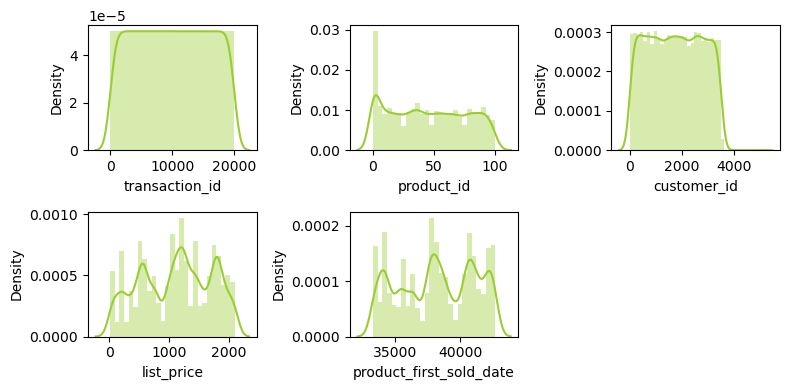

In [71]:
# distribution numerical data
nums_t = ['transaction_id', 'product_id', 'customer_id', 'list_price', 'product_first_sold_date']
plt.figure(figsize=(8, 4))
for i in range(0, len(nums_t)):
    plt.subplot(2, 3, i+1)
    sns.distplot(df_tran[nums_t[i]], color='yellowgreen')
    plt.tight_layout()

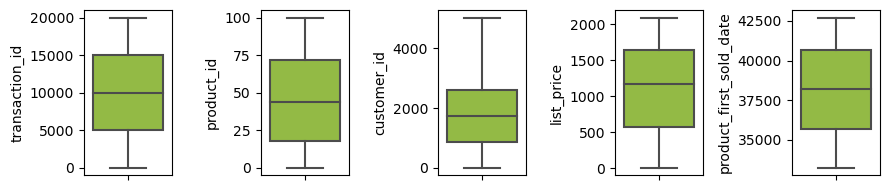

In [72]:
# distribution numerical data and check outlier
plt.figure(figsize=(9, 2))
for i in range(0, len(nums_t)):
    plt.subplot(1, len(nums_t), i+1)
    sns.boxplot(y=df_tran[nums_t[i]], color='yellowgreen', orient='v')
    plt.tight_layout()

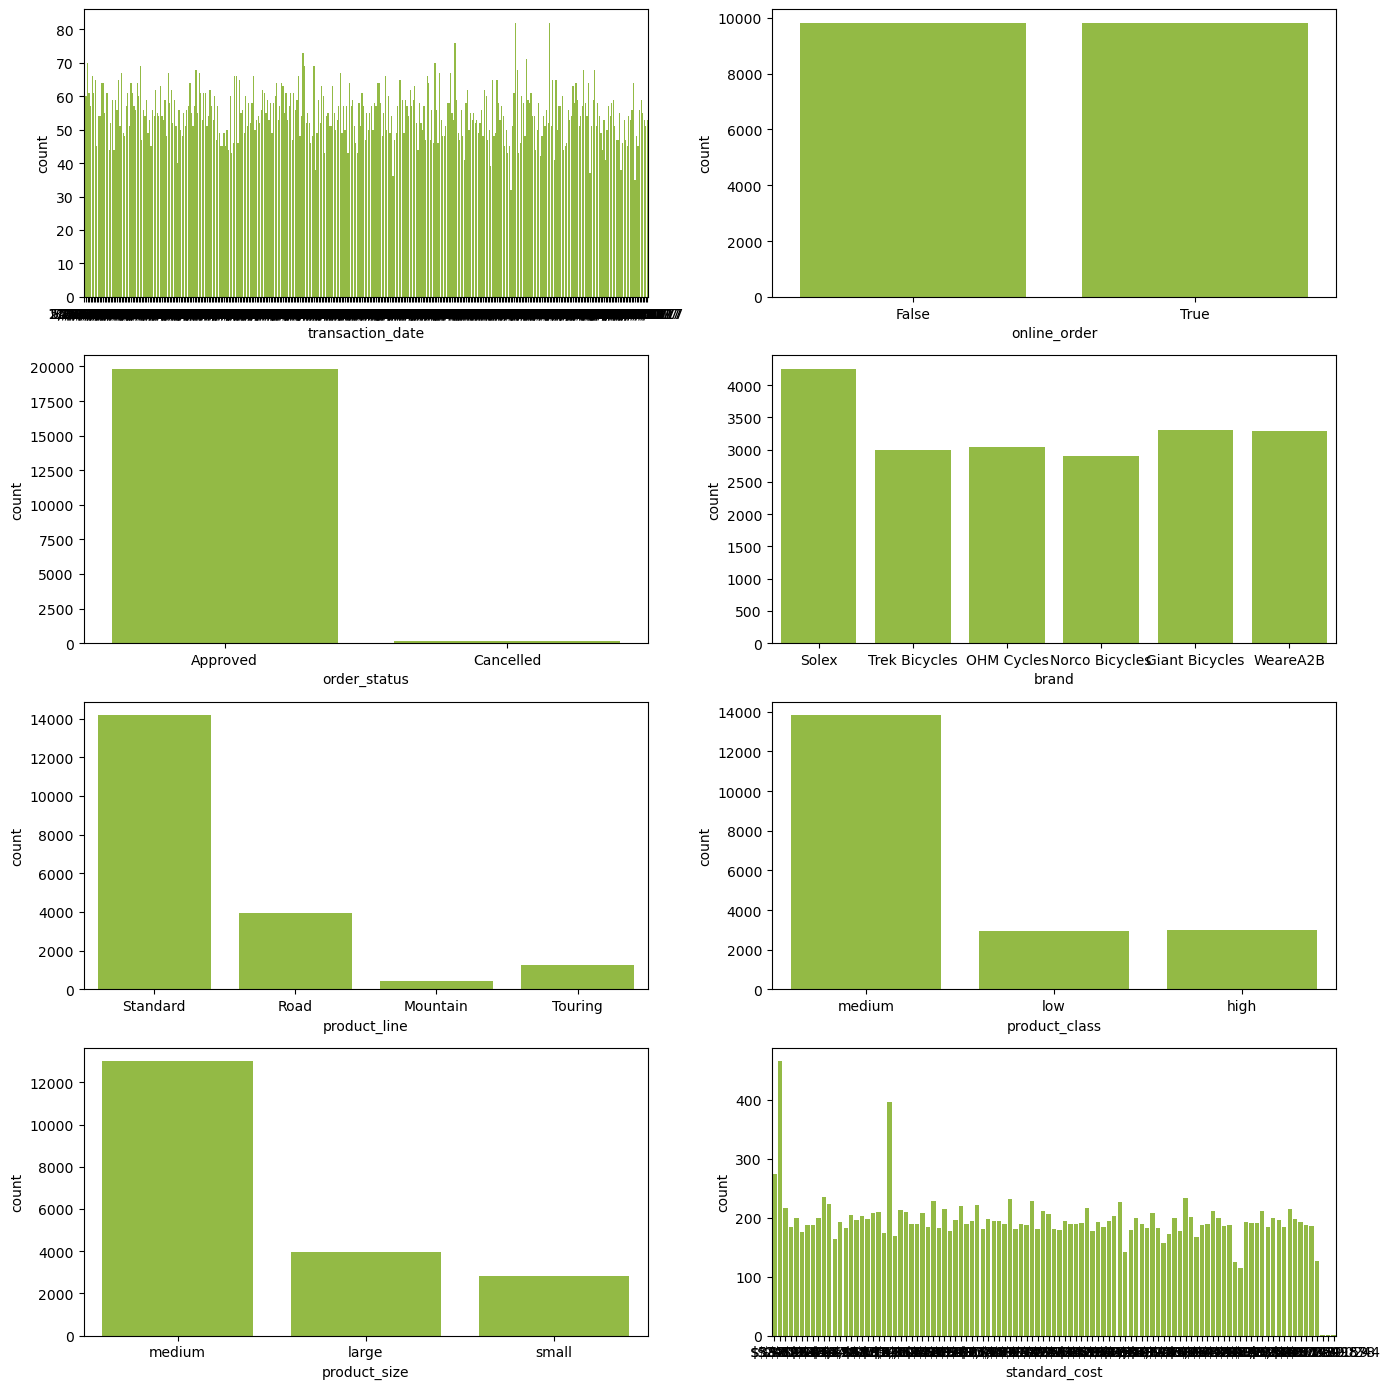

In [73]:
plt.figure(figsize=(14, 14))
for i in range(0, len(cats_t)):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=df_tran[cats_t[i]], color='yellowgreen', orient='v')
    plt.tight_layout()

### **2. Data Cleaning**

#### 2.1 Dropping Irrelevan Columns

In [74]:
df_tran1 = df_tran.copy()

In [75]:
# dropping columns
df_tran1.drop(columns=['Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 
                       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 
                       'Unnamed: 25'], inplace=True)

In [76]:
# checking
df_tran1.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

The dataset has been cleared of irrelevant columns ✅

#### 2.2 Handling Missing Values

In [77]:
df_tran1.isna().sum()

transaction_id               1
product_id                   1
customer_id                  1
transaction_date             1
online_order               361
order_status                 1
brand                      198
product_line               198
product_class              198
product_size               198
list_price                   1
standard_cost              198
product_first_sold_date    198
dtype: int64

In [78]:
# drop missing value
df_tran1.dropna(inplace=True)

In [79]:
# checking
df_tran1.isna().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

The dataset has been cleared of missing values ✅

#### 2.3 Handling Data Type & Incorrect Values

🔽 **`transaction_id`, `product_id`, `customer_id`, `product_first_sold_date`**
> from float to integer

In [80]:
# changing to integer
col_int = ['transaction_id', 'product_id', 'customer_id', 'product_first_sold_date']
df_tran1[col_int] = df_tran1[col_int].astype('int64')

🔽 **`standard_cost`**
> removing character : '$' and ',' <br>
> changing datatype to float

In [81]:
# removing unwanted character in columns
df_tran1['standard_cost'] = df_tran1['standard_cost'].str.replace('$','')
df_tran1['standard_cost'] = df_tran1['standard_cost'].str.replace(',','')

In [82]:
# changing to float
df_tran1['standard_cost'] = df_tran1['standard_cost'].astype('float64')

🔽 **`transaction_date`**

In [83]:
# changing datatype transaction date
import datetime as dt

df_tran1['transaction_date'] = df_tran1['transaction_date'].astype('datetime64[ns]')
df_tran1['transaction_date'] = df_tran1['transaction_date'].dt.strftime('%Y-%m-%d').astype('datetime64[ns]')

🔽 **`product_first_sold_date`**

In [84]:
# unix time values to datetime
df_tran1['product_first_sold_date'] = pd.TimedeltaIndex(df_tran1['product_first_sold_date'], unit='d') + dt.datetime(1900,1,1)

In [85]:
#sampling dataset
df_tran1.sample(3)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
565,566,90,178,2017-11-28,False,Approved,Norco Bicycles,Standard,low,medium,363.01,290.41,2005-05-12
17514,17515,92,110,2017-05-22,True,Approved,WeareA2B,Standard,medium,small,1415.01,1259.36,2003-01-07
8517,8518,38,603,2017-02-12,False,Approved,Solex,Standard,medium,medium,1577.53,826.51,2011-03-18


🔽 **`order_status`**

In [86]:
df_tran1[df_tran1['order_status']=='Cancelled'].sample(2)

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
7736,7737,49,2039,2017-05-01,False,Cancelled,Solex,Standard,medium,large,1061.56,733.58,2011-08-26
10627,10628,52,2936,2017-07-26,True,Cancelled,OHM Cycles,Road,medium,medium,1280.28,829.51,2013-09-18


In the order_status column with the **Cancelled value**, it can be assumed that the **transaction was canceled so the company did not get revenue**. We decide to delete the data record that has the Cancelled value and then we drop the column. The data retrieved is the successful transaction data.

In [87]:
# deleting rows that order status is cancelled -> not generate revenue
df_tran1 = df_tran1[df_tran1['order_status']!='Cancelled']

In [88]:
# remove columns order status
df_tran1.drop(columns=['order_status'], inplace=True)

In [89]:
df_tran1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19273 entries, 0 to 19999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           19273 non-null  int64         
 1   product_id               19273 non-null  int64         
 2   customer_id              19273 non-null  int64         
 3   transaction_date         19273 non-null  datetime64[ns]
 4   online_order             19273 non-null  object        
 5   brand                    19273 non-null  object        
 6   product_line             19273 non-null  object        
 7   product_class            19273 non-null  object        
 8   product_size             19273 non-null  object        
 9   list_price               19273 non-null  float64       
 10  standard_cost            19273 non-null  float64       
 11  product_first_sold_date  19273 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(2)

The dataset has been cleared ✅

### 3. Save Clean Dataset

In [90]:
df_tran1.to_csv('Transaction_CLEAN.csv', index=False)

Getting transaction data in the past three months.

In [91]:
# sorting by latest date
df_tran1 = df_tran1.sort_values(by='transaction_date', ascending=False)

In [92]:
# filtering data in the past three months
df_tran_latest = df_tran1[(df_tran1['transaction_date'] >= '2017-10-01') & (df_tran1['transaction_date'] <= '2017-12-30')]
df_tran_latest

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
17393,17394,20,933,2017-12-30,False,Trek Bicycles,Standard,medium,small,1775.81,1580.47,1996-04-07
605,606,70,2878,2017-12-30,False,Trek Bicycles,Standard,high,medium,495.72,297.43,1999-07-28
5041,5042,90,1985,2017-12-30,False,Norco Bicycles,Standard,low,medium,363.01,290.41,1999-07-28
10904,10905,0,2659,2017-12-30,False,Solex,Standard,medium,medium,100.35,75.26,2004-01-18
410,411,62,3355,2017-12-30,False,Solex,Standard,medium,medium,478.16,298.72,1993-06-25
...,...,...,...,...,...,...,...,...,...,...,...,...
17007,17008,5,2293,2017-10-01,True,Trek Bicycles,Mountain,low,medium,574.64,459.71,2011-08-31
5293,5294,14,1332,2017-10-01,False,Trek Bicycles,Standard,medium,small,1386.84,1234.29,2010-05-07
414,415,76,2939,2017-10-01,True,WeareA2B,Standard,low,medium,642.31,513.85,1991-07-12
17350,17351,82,1247,2017-10-01,False,Norco Bicycles,Standard,high,medium,1148.64,689.18,2015-08-12


In [93]:
# cheking date
df_tran_latest['transaction_date']

17393   2017-12-30
605     2017-12-30
5041    2017-12-30
10904   2017-12-30
410     2017-12-30
           ...    
17007   2017-10-01
5293    2017-10-01
414     2017-10-01
17350   2017-10-01
19847   2017-10-01
Name: transaction_date, Length: 4893, dtype: datetime64[ns]

In [94]:
# saving dataset
df_tran_latest.to_csv('Transaction_3months_CLEAN.csv', index=False)

In [95]:
df_tran_latest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 17393 to 19847
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           4893 non-null   int64         
 1   product_id               4893 non-null   int64         
 2   customer_id              4893 non-null   int64         
 3   transaction_date         4893 non-null   datetime64[ns]
 4   online_order             4893 non-null   object        
 5   brand                    4893 non-null   object        
 6   product_line             4893 non-null   object        
 7   product_class            4893 non-null   object        
 8   product_size             4893 non-null   object        
 9   list_price               4893 non-null   float64       
 10  standard_cost            4893 non-null   float64       
 11  product_first_sold_date  4893 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64